## 파일 불러오기

#### (1) 파일을 읽어 확인해본다

In [2]:
# 작업 디렉토리 확인
from pathlib import Path

print(Path.cwd())

C:\Users\User\Project


In [5]:
# 파일 읽기
f = open('cafe1.txt', 'r', encoding='UTF-8')
cf1 = f.read()
f.close()

# 확인(100 글자만)
cf1[:100]

'신당역 카페 무화과나무 바라보며 커피타임 레레플레이\n\n< 카페 : 리뷰 >\n\n돌의 질감과 나무가 함께\n\n어우러지는 분위기 예쁜 카페\n\n\n\n\u200b\n\n올해 말 결혼식을 앞두고 신혼집으로 '

## 데이터 전처리

#### (2) txt 7개 한개로 합치기

In [6]:
# 데이터 타입 확인
type(cf1)

str

In [7]:
# cafe2~7 파일 읽기
f = open('cafe2.txt', 'r', encoding='UTF-8')
cf2 = f.read()
f.close()

f = open('cafe3.txt', 'r', encoding='UTF-8')
cf3 = f.read()
f.close()

f = open('cafe4.txt', 'r', encoding='UTF-8')
cf4 = f.read()
f.close()

f = open('cafe5.txt', 'r', encoding='UTF-8')
cf5 = f.read()
f.close()

f = open('cafe6.txt', 'r', encoding='UTF-8')
cf6 = f.read()
f.close()

f = open('cafe7.txt', 'r', encoding='UTF-8')
cf7 = f.read()
f.close()

In [8]:
cf = cf1 + cf2 + cf3 + cf4 + cf5 + cf6 +cf7
cf[:100]

# \u200b 제거
for x in {'\u200b': ' '}:
        cf = cf.replace(x, ' ')

#### (3) 단어 추출
- split 메서드로 단어마다 잘라 리스트 형태로 변환

In [9]:
# 공백을 구분자로 하여 단어 단위로 자르기
wordList = cf.split()

# 확인(10 개만)
wordList[:10]

['신당역', '카페', '무화과나무', '바라보며', '커피타임', '레레플레이', '<', '카페', ':', '리뷰']

In [11]:
# 앞뒤 특수문자 제거
wordList_ptmk = [] # punctuation marks
ptmk = ',.!?"<>[]()~:-@#$%^&{}/`\|'

for i in wordList:
    wordList_ptmk.append(i.strip(ptmk)) # 문장부호를 뗀걸 리스트에 더한다

wordList_ptmk[:10]

['신당역', '카페', '무화과나무', '바라보며', '커피타임', '레레플레이', '', '카페', '', '리뷰']

In [22]:
# 명사 뒤의 조사 제거
wordList_pp = [] # postposition
pp = ['은', '는', '이', '가', '을', '를', '이랑', '에', '에서', '도', '에도', '와', '과', '랑', '의']

for i in wordList_ptmk:
    if len(i) == 0:
        pass
    elif i[-1] in pp:
        wordList_pp.append(i[:-1])
    elif i[-2:] in pp:
        wordList_pp.append(i[:-2])
    else:
        wordList_pp.append(i)

# 확인
wordList_pp[:10]

['신당역', '카페', '무화과나무', '바라보며', '커피타임', '레레플레', '카페', '리뷰', '돌', '질감']

In [23]:
wordList_delzero = [w for w in wordList_pp if w != '']
wordList_delzero[:10]

['신당역', '카페', '무화과나무', '바라보며', '커피타임', '레레플레', '카페', '리뷰', '돌', '질감']

## 워드 클라우드 제작

- 단어별 빈도수를 계산해 딕셔너리로 저장

In [24]:
# 중복 단어 제거
wordSet = set(wordList_delzero)

# 딕셔너리 선언
wordCount = {}

# 단어별 개수 저장
for w in wordSet:
    wordCount[w] = wordList_delzero.count(w)

# 확인
print(wordCount)

{'배치해둔': 1, '진심인듯해보였던': 1, '없다했어요': 1, '있고': 5, '心洗亭': 2, '없음': 2, '참': 9, '녹초ㅠ': 1, '듯한': 4, '쭉': 3, '달려있': 1, '모든': 2, '대체': 1, '쌈박해요': 1, '건물': 1, '둘러보니': 1, '근사하고': 1, '가야': 1, '12시쯤': 1, '영업': 1, '메이플+귀리+코코넛칩': 1, '말차': 2, '해요': 2, '있다면': 1, '살짝': 4, '나오자마자': 1, '내려주면': 1, '갬성': 2, '선물해드리려고': 1, '쫄깃하다며': 1, '하얀두부에요': 1, '골랐어요': 1, '영업시간': 6, '있': 19, '가': 3, '있었어요': 3, '내외': 2, '평일': 6, '4~5개': 1, '외에': 1, '먹으니': 2, '추세인데': 1, '주문했는데': 2, '긍정정인': 1, '캐릭터포스터': 1, '지쳐': 1, '박혀있어': 1, '메뉴판': 6, '재미난': 1, '차량번호': 2, '순삭되더라구요': 1, '있었다': 1, '깔끔하고': 1, '울려서': 2, '한번': 3, '못잘것같아서': 1, '있는데': 2, '라떼': 2, '그때': 1, '들어': 3, '힐링': 1, '•': 2, '일요일': 1, '발견한': 1, '영감': 2, '검진': 1, '싶어서': 1, 'SNS': 1, '후기였습니다': 1, 'cafegreen163': 2, '거하게': 1, '가끔씩': 1, '않더라구요': 1, '수준으로': 1, '화장실': 1, '얼굴': 1, '이게': 2, '부담스럽게': 1, '오예했는데': 1, '보일': 2, '느껴진다고': 1, '루이보스': 2, '가보고': 1, '동그란건': 1, '저격하': 1, '근데': 8, '추정': 1, '음료': 8, '받아가시면': 1, '동대문이': 1, '듯했답니다': 1, '가져온': 1, '찾았던': 1, '낮아': 1, '2500원이나': 1, '유기

- 데이터 빈도수 텍스트로 확인

In [25]:
# value 값을 기준으로 wordCount 결과값 정렬
print(sorted(wordCount.items(), key=lambda x:x[1], reverse=True))

[('카페', 41), ('커피', 34), ('수', 31), ('신당역', 29), ('너무', 24), ('맛', 21), ('것', 21), ('있', 19), ('ㅎㅎ', 19), ('메뉴', 19), ('잘', 17), ('메일룸', 17), ('심세정', 16), ('다', 16), ('많', 16), ('안', 15), ('더', 15), ('마일더스', 15), ('느낌', 14), ('디저트', 14), ('좋', 14), ('다쿠아즈', 13), ('카페그린', 13), ('빵', 13), ('밀크티', 13), ('바로', 13), ('공간', 12), ('정말', 12), ('신당역카페', 12), ('자리', 12), ('이렇게', 11), ('동대문', 11), ('스콘', 11), ('그릭요거트', 11), ('진짜', 11), ('베이커리', 10), ('제', 10), ('내', 10), ('같', 10), ('참', 9), ('및', 9), ('중구', 9), ('분위기', 9), ('또', 9), ('근데', 8), ('음료', 8), ('줄', 8), ('좀', 8), ('에스프레소', 8), ('주차', 8), ('저', 8), ('나', 8), ('그리고', 8), ('사진', 8), ('유기농', 7), ('반려인', 7), ('서울특별시', 7), ('시간', 7), ('먹', 7), ('○', 7), ('있어서', 7), ('츄러스', 7), ('맛집', 7), ('내부', 7), ('테이블', 7), ('진동벨', 7), ('같아요', 7), ('먹고', 7), ('1층', 7), ('영업시간', 6), ('평일', 6), ('메뉴판', 6), ('꽤', 6), ('함께', 6), ('베리비엔나', 6), ('위치', 6), ('거', 6), ('얼음', 6), ('동생', 6), ('아포테케리', 6), ('좋아하', 6), ('종류', 6), ('생각', 6), ('곳', 6), ('ㅋㅋ', 6), ('꼭',

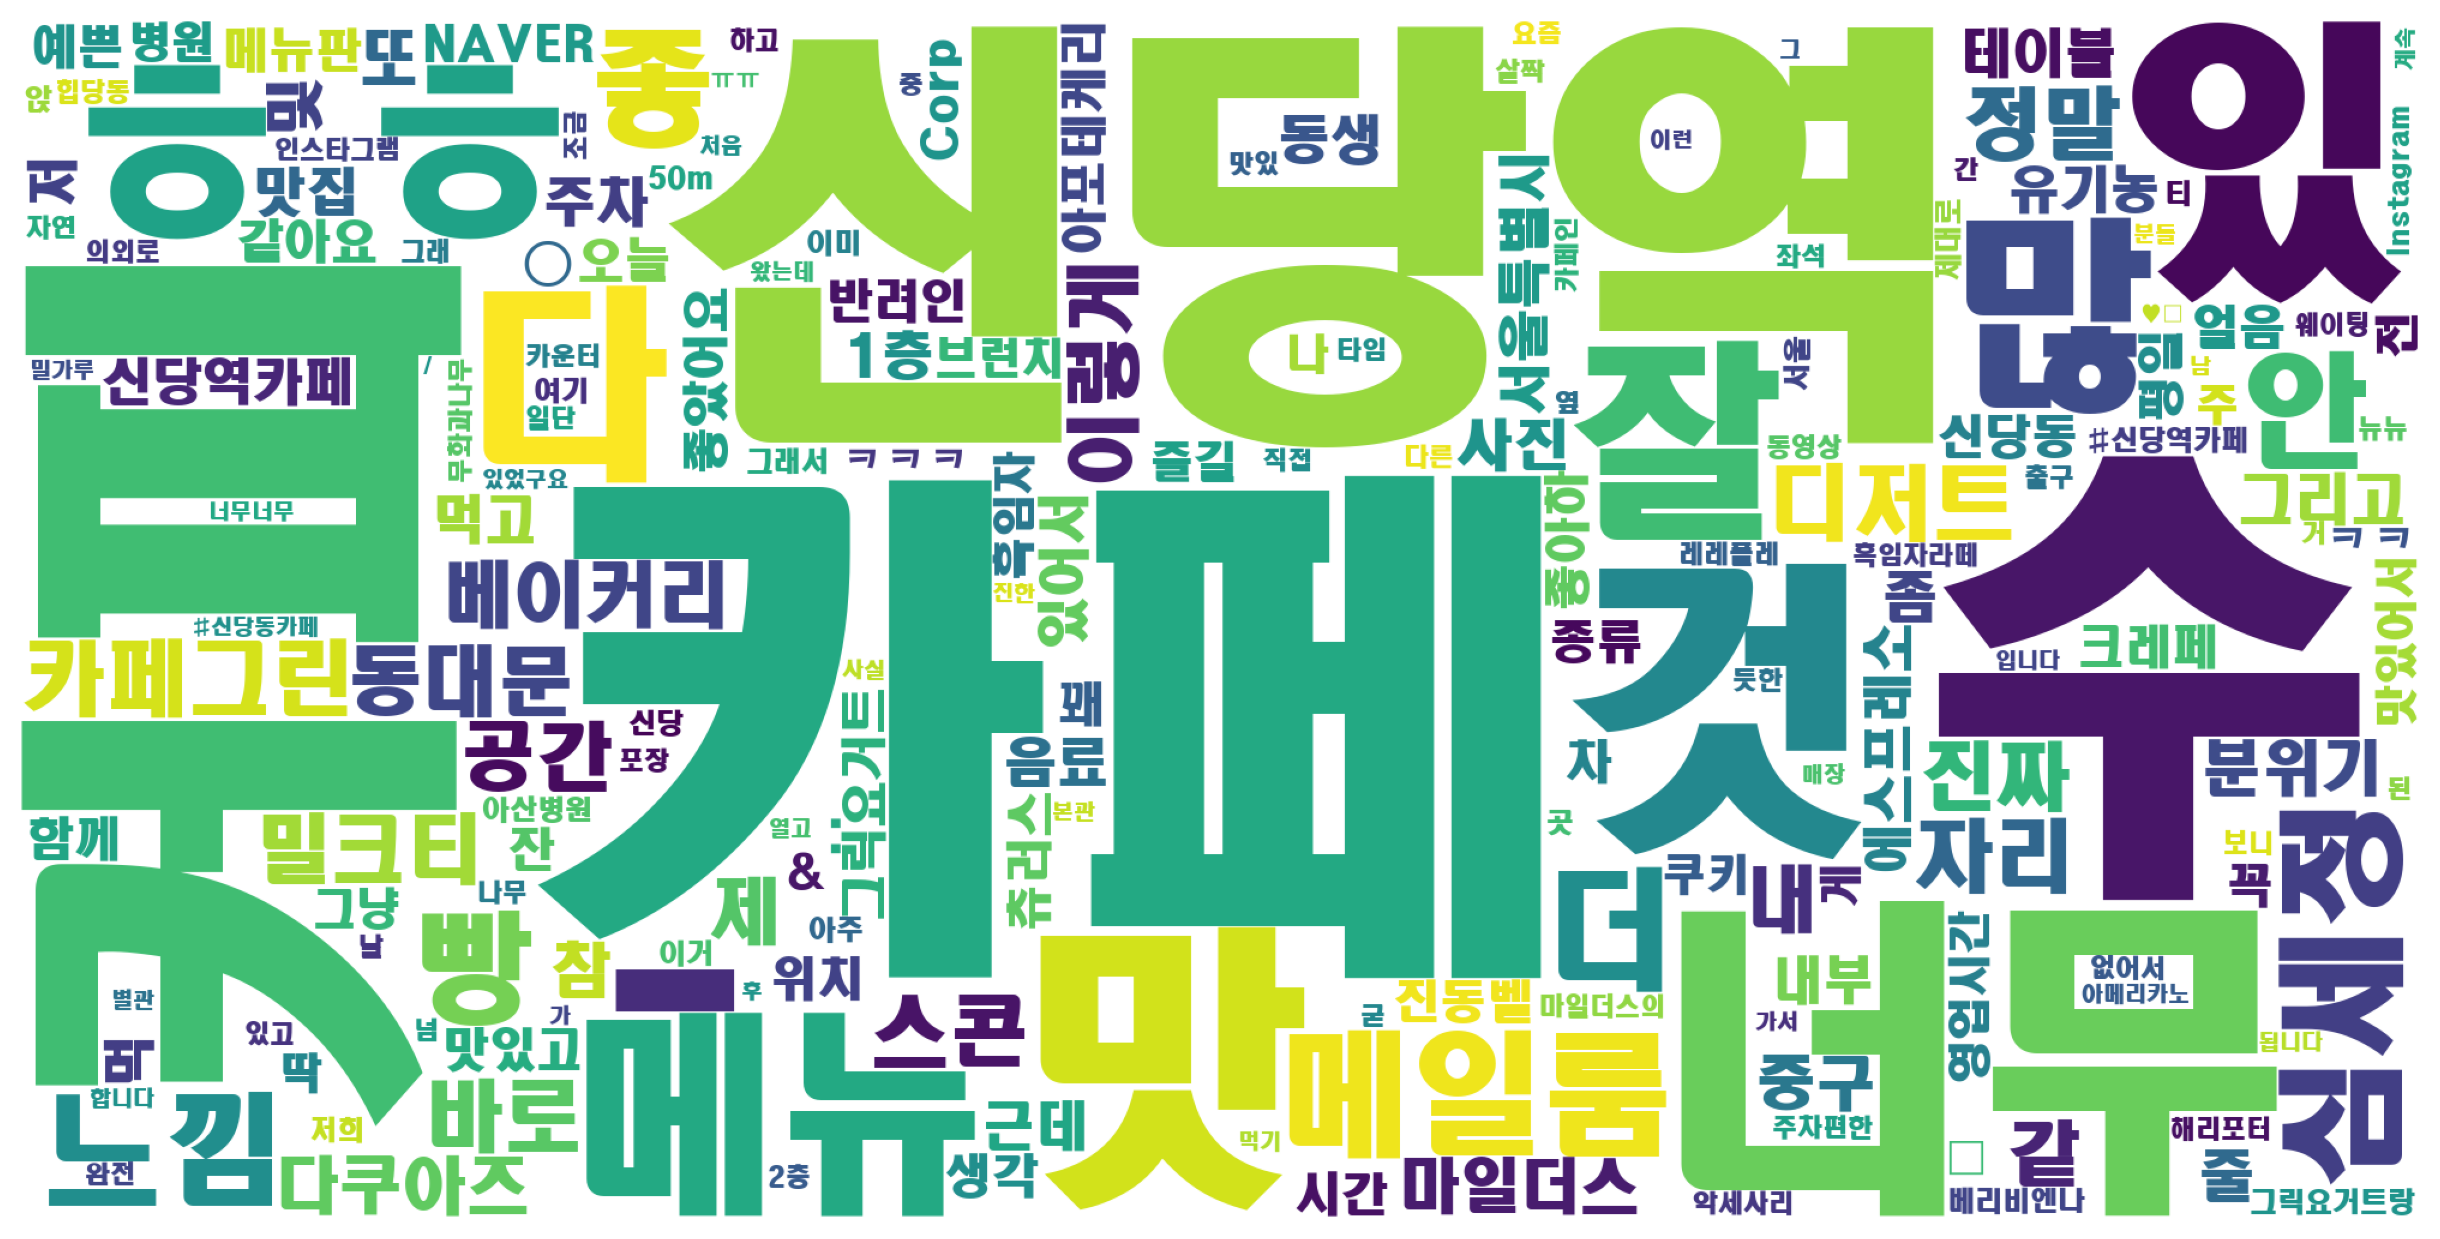

In [20]:
# 패키지 설치
!pip install wordcloud

# 라이브러리 불러오기
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%config InlineBackend.figure_format='retina'

# 워드 클라우드 만들기
wordcloud = WordCloud(font_path = 'C:/Windows/fonts/HMKMRHD.TTF',
                      width=2000,
                      height=1000,
                      background_color='white').generate_from_frequencies(wordCount)

# 표시하기
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()